# Problem 2: Finding the optimal $k$ using Leave-One-Out Cross Validation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz


##Preprocessing the MNIST dataset
We normalize the pixel values and select a random 10% subset of the dataset.

In [ ]:
with np.load('mnist.npz') as data:
  X_train = data['train_data']/255
  y_train = data['train_labels']
  X_test = data['train_data']/255
  y_test = data['train_labels']

sample_size = int(0.1*len(X_train))
idx = np.random.choice(len(X_train), sample_size, replace=False)
X_train = X_train[idx]
y_train = y_train[idx]

## LOO Cross-Validation

In [ ]:
acc_all_k = []
for k in range(1,11):
  accuracies = []
  loo = LeaveOneOut()
  model = KNeighborsClassifier(n_neighbors=k)
  for train_index, test_index in loo.split(X_train):
    X_train_loo, X_test_loo = X_train[train_index], X_train[test_index]
    y_train_loo, y_test_loo = y_train[train_index], y_train[test_index]
    model.fit(X_train_loo.reshape(-1,28*28), y_train_loo)
    y_pred = model.predict(X_test_loo.reshape(-1,28*28))
    accuracies.append(y_pred==y_test_loo)
  acc_all_k.append(accuracies)

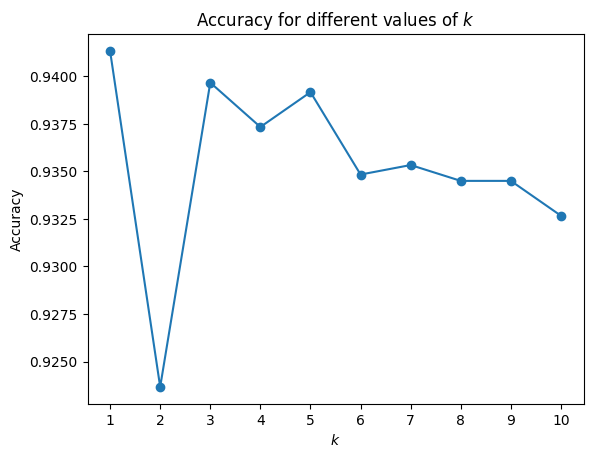

In [ ]:
acc_all_k_avg = np.mean(acc_all_k, axis=1)
plt.plot(range(1,11), acc_all_k_avg, marker='o', linestyle='-')
plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of $k$')
plt.xticks(ticks=range(1,11))
plt.show()

We achieve the highest accuracy for $k=1$. However, to avoid overfitting, we should consider the next best options. The second and third highest accuracies are obtained with $k=3$ and $k=5$, respectively.